In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from prophet import Prophet


Importing plotly failed. Interactive plots will not work.


In [11]:
df=pd.read_excel("Adidas US Sales Datasets.xlsx")
df.columns = df.iloc[3].values
df = df[4:].reset_index(drop=True)
df.drop(df.columns[0],axis=1,inplace=True)
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [12]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [184]:
df["Invoice Date"] = pd.to_datetime(df["Invoice Date"])
df = df.sort_values("Invoice Date")

In [185]:
len(df)

9648

In [202]:
df_model=df.rename(columns={"Invoice Date":"ds","Total Sales":"y"})
df_test=df_model[7718:]
df_train=df_model[:7718]

In [203]:
%%time
model=Prophet(changepoints=['2021-01-01'])
model.fit(df_train)

22:43:09 - cmdstanpy - INFO - Chain [1] start processing
22:43:09 - cmdstanpy - INFO - Chain [1] done processing


CPU times: total: 359 ms
Wall time: 699 ms


In [204]:
result=model.predict(df_test)
result.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-10-08,94414.89796,-65804.549172,295106.187357,94414.89796,94414.89796,13466.644067,13466.644067,13466.644067,13466.644067,13466.644067,13466.644067,0.0,0.0,0.0,107881.542026
1,2021-10-08,94414.89796,-68755.943134,291106.222098,94414.89796,94414.89796,13466.644067,13466.644067,13466.644067,13466.644067,13466.644067,13466.644067,0.0,0.0,0.0,107881.542026
2,2021-10-08,94414.89796,-74648.406959,289827.382117,94414.89796,94414.89796,13466.644067,13466.644067,13466.644067,13466.644067,13466.644067,13466.644067,0.0,0.0,0.0,107881.542026
3,2021-10-08,94414.89796,-77474.761220,293361.566136,94414.89796,94414.89796,13466.644067,13466.644067,13466.644067,13466.644067,13466.644067,13466.644067,0.0,0.0,0.0,107881.542026
4,2021-10-08,94414.89796,-70976.003814,293549.938433,94414.89796,94414.89796,13466.644067,13466.644067,13466.644067,13466.644067,13466.644067,13466.644067,0.0,0.0,0.0,107881.542026


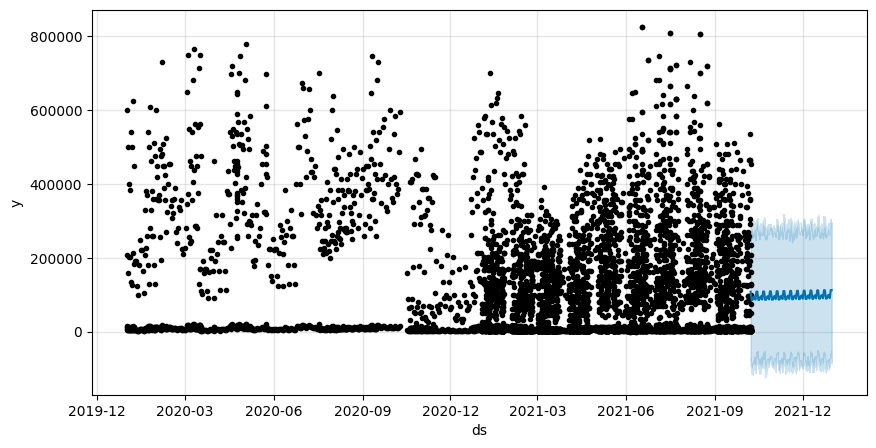

In [205]:
fig,ax=plt.subplots(figsize=(10,5))
fig=model.plot(result,ax=ax)
plt.show()

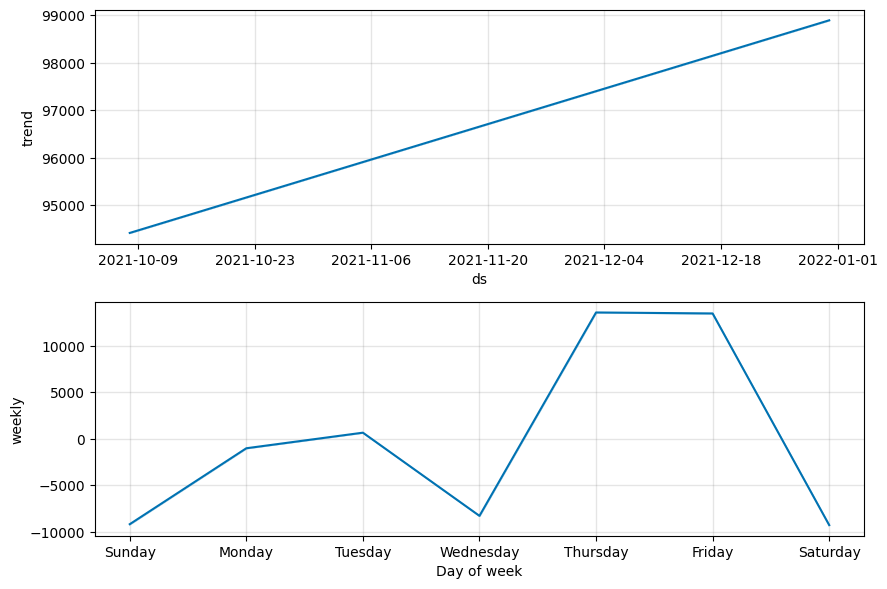

In [206]:
fig=model.plot_components(result)
plt.show()

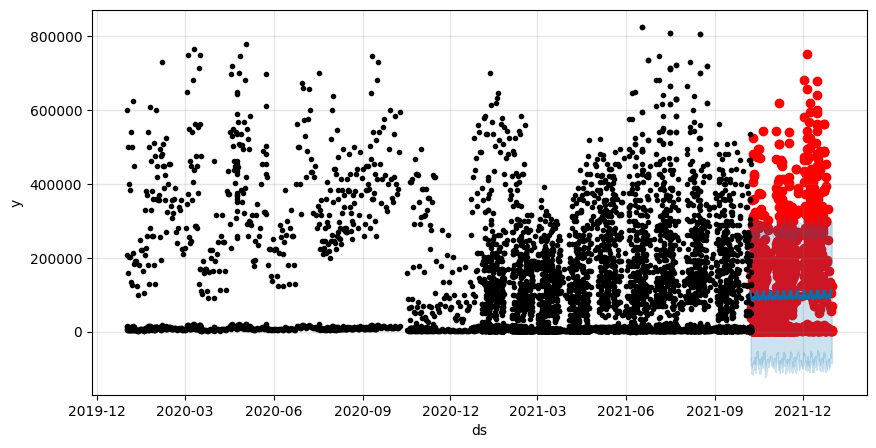

In [207]:
fig,ax=plt.subplots(figsize=(10,5))
ax.scatter(df_test['ds'],df_test['y'],color='r')
fig=model.plot(result,ax=ax)

In [208]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df_test['y'],result['yhat'])

18124394345.00886

In [209]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df_test['y'],result['yhat'])

108576.46902750854

In [210]:
future=model.make_future_dataframe(periods=365,freq='D',include_history=True)
forecast=model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,169438.747500,-4806.126295,345128.391614,169438.747500,169438.747500,-8268.298470,-8268.298470,-8268.298470,-8268.298470,-8268.298470,-8268.298470,0.0,0.0,0.0,161170.449030
1,2020-01-02,169193.012515,11252.703315,368472.233602,169193.012515,169193.012515,13572.097110,13572.097110,13572.097110,13572.097110,13572.097110,13572.097110,0.0,0.0,0.0,182765.109625
2,2020-01-03,168947.277529,-5219.454886,367810.952046,168947.277529,168947.277529,13466.644067,13466.644067,13466.644067,13466.644067,13466.644067,13466.644067,0.0,0.0,0.0,182413.921596
3,2020-01-04,168701.542544,-22982.619107,341227.732627,168701.542544,168701.542544,-9260.214795,-9260.214795,-9260.214795,-9260.214795,-9260.214795,-9260.214795,0.0,0.0,0.0,159441.327749
4,2020-01-05,168455.807559,-24572.618651,329543.573929,168455.807559,168455.807559,-9164.462269,-9164.462269,-9164.462269,-9164.462269,-9164.462269,-9164.462269,0.0,0.0,0.0,159291.345290


In [218]:
final_df=df_model.merge(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']],on='ds')
final_df.head()

,Retailer,Retailer ID,ds,Region,State,City,Product,Price per Unit,Units Sold,y,Operating Profit,Operating Margin,Sales Method,yhat,yhat_lower,yhat_upper
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store,161170.44903,-4806.126295,345128.391614
1,Foot Locker,1185732,2020-01-01,Northeast,Pennsylvania,Philadelphia,Women's Apparel,75,275,206250,61875,0.3,Outlet,161170.44903,-4806.126295,345128.391614
2,Foot Locker,1185732,2020-01-01,Northeast,Pennsylvania,Philadelphia,Women's Apparel,53,83,4399,1407.68,0.32,Outlet,161170.44903,-4806.126295,345128.391614
3,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,47,336,15792,9633.12,0.61,Online,161170.44903,-4806.126295,345128.391614
4,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,34,384,13056,6789.12,0.52,Outlet,161170.44903,-4806.126295,345128.391614


In [219]:
final_df.to_csv("sales_forecast.csv", index=False)